In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_paris_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Paris')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/paris_{date}.csv',index=False)
get_listings_paris_timeseries()

In [3]:
# pull in detailed_listings
raw_df_paris = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_paris)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(paris_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 49634 AirBnb listings.


In [4]:
paris_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2020-12.csv')
paris_raw_df_12_12_2020.shape





(65917, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for paris
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_paris = glob.glob('paris/**.csv')
files_paris

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


[]

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

paris_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(paris_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(paris_raw_df_12_12_2020['price'].mean(),2)}.")

paris_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(paris_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_1_9_2021['price'].mean(),2)}.")

paris_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(paris_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_2_8_2021['price'].mean(),2)}.")

paris_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(paris_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_3_4_2021['price'].mean(),2)}.")

paris_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(paris_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_4_9_2021['price'].mean(),2)}.")

#paris_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(paris_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_5_19_2021['price'].mean(),2)}.")

paris_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(paris_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_6_3_2021['price'].mean(),2)}.")

paris_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(paris_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_7_4_2021['price'].mean(),2)}.")

paris_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(paris_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_8_6_2021['price'].mean(),2)}.")

paris_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(paris_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_9_7_2021['price'].mean(),2)}.")

paris_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(paris_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_10_6_2021['price'].mean(),2)}.")

#paris_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(paris_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(paris_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 65917 AirBnb listings; the avg price is €114.28.
The 1_9_2021 dataset contains 65256 AirBnb listings; the avg price is €112.89.
The 2_8_2021 dataset contains 64690 AirBnb listings; the avg price is €113.1.
The 3_4_2021 dataset contains 64347 AirBnb listings; the avg price is €112.39.
The 4_9_2021 dataset contains 63090 AirBnb listings; the avg price is €112.92.
The 6_3_2021 dataset contains 61105 AirBnb listings; the avg price is €117.4.
The 7_4_2021 dataset contains 51040 AirBnb listings; the avg price is €124.53.
The 8_6_2021 dataset contains 51354 AirBnb listings; the avg price is €123.43.
The 9_7_2021 dataset contains 50133 AirBnb listings; the avg price is €125.89.
The 10_6_2021 dataset contains 49634 AirBnb listings; the avg price is €130.2.


In [7]:
df_list_paris = [paris_raw_df_12_12_2020, paris_raw_df_1_9_2021, paris_raw_df_2_8_2021,
           paris_raw_df_3_4_2021, paris_raw_df_4_9_2021,  paris_raw_df_6_3_2021, paris_raw_df_7_4_2021,
           paris_raw_df_8_6_2021, paris_raw_df_9_7_2021, paris_raw_df_10_6_2021]

dates_paris = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_paris = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_paris = []

def airbnb_parse_paris(df_list, files):
    for file in files_paris:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_{file}.csv")
        print(f"The {file} paris dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_paris(df_list, dates):
    for file in files_paris:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/paris/paris_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_paris.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_paris)

paris_parse = airbnb_parse_paris(df_list_paris, files_paris)


The 2020-12 paris dataset contains 65917 AirBnb listings -- the avg price is €114.28.
The 2021-01 paris dataset contains 65256 AirBnb listings -- the avg price is €112.89.
The 2021-02 paris dataset contains 64690 AirBnb listings -- the avg price is €113.1.
The 2021-03 paris dataset contains 64347 AirBnb listings -- the avg price is €112.39.
The 2021-04 paris dataset contains 63090 AirBnb listings -- the avg price is €112.92.
The 2021-06 paris dataset contains 61105 AirBnb listings -- the avg price is €117.4.
The 2021-07 paris dataset contains 51040 AirBnb listings -- the avg price is €124.53.
The 2021-08 paris dataset contains 51354 AirBnb listings -- the avg price is €123.43.
The 2021-09 paris dataset contains 50133 AirBnb listings -- the avg price is €125.89.
The 2021-10 paris dataset contains 49634 AirBnb listings -- the avg price is €130.2.


In [8]:
paris_summary = airbnb_to_frame_paris(df_list_paris, files_paris)
paris_summary['Date of scrape'] = pd.to_datetime(paris_summary['Date of scrape'])
paris_summary['City'] = 'Paris'
paris_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,65917,114.28,80.0,0,11600,0.69,Paris
1,2021-01-01,65256,112.89,80.0,0,11600,0.68,Paris
2,2021-02-01,64690,113.10,80.0,0,12000,0.66,Paris
3,2021-03-01,64347,112.39,80.0,0,12000,0.66,Paris
4,2021-04-01,63090,112.92,80.0,0,11600,0.63,Paris
5,2021-06-01,61105,117.40,80.0,0,11600,0.63,Paris
6,2021-07-01,51040,124.53,85.0,0,11600,0.71,Paris
7,2021-08-01,51354,123.43,85.0,0,11600,0.76,Paris
8,2021-09-01,50133,125.89,88.0,0,11600,0.79,Paris
9,2021-10-01,49634,130.20,90.0,0,11600,0.81,Paris


<AxesSubplot:xlabel='Date of scrape'>

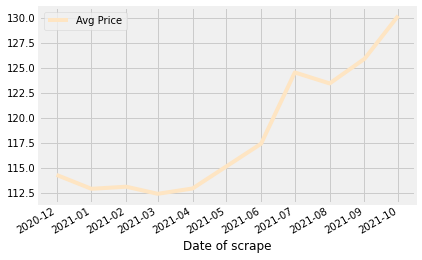

In [18]:
paris_summary.plot(x='Date of scrape', y='Avg Price')

In [9]:
master_df_paris = pd.concat(df_list_paris)
master_df_paris_unique = master_df_paris.drop_duplicates(subset='id')
master_df_paris_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.04,1,364,NaN,NaN
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,2,NaN,NaN
2,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,69,5,23,2020-09-07,0.21,14,67,NaN,NaN
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,62,1,231,2020-11-05,1.65,1,90,NaN,NaN
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,53,15,269,2020-08-15,2.28,3,348,NaN,NaN


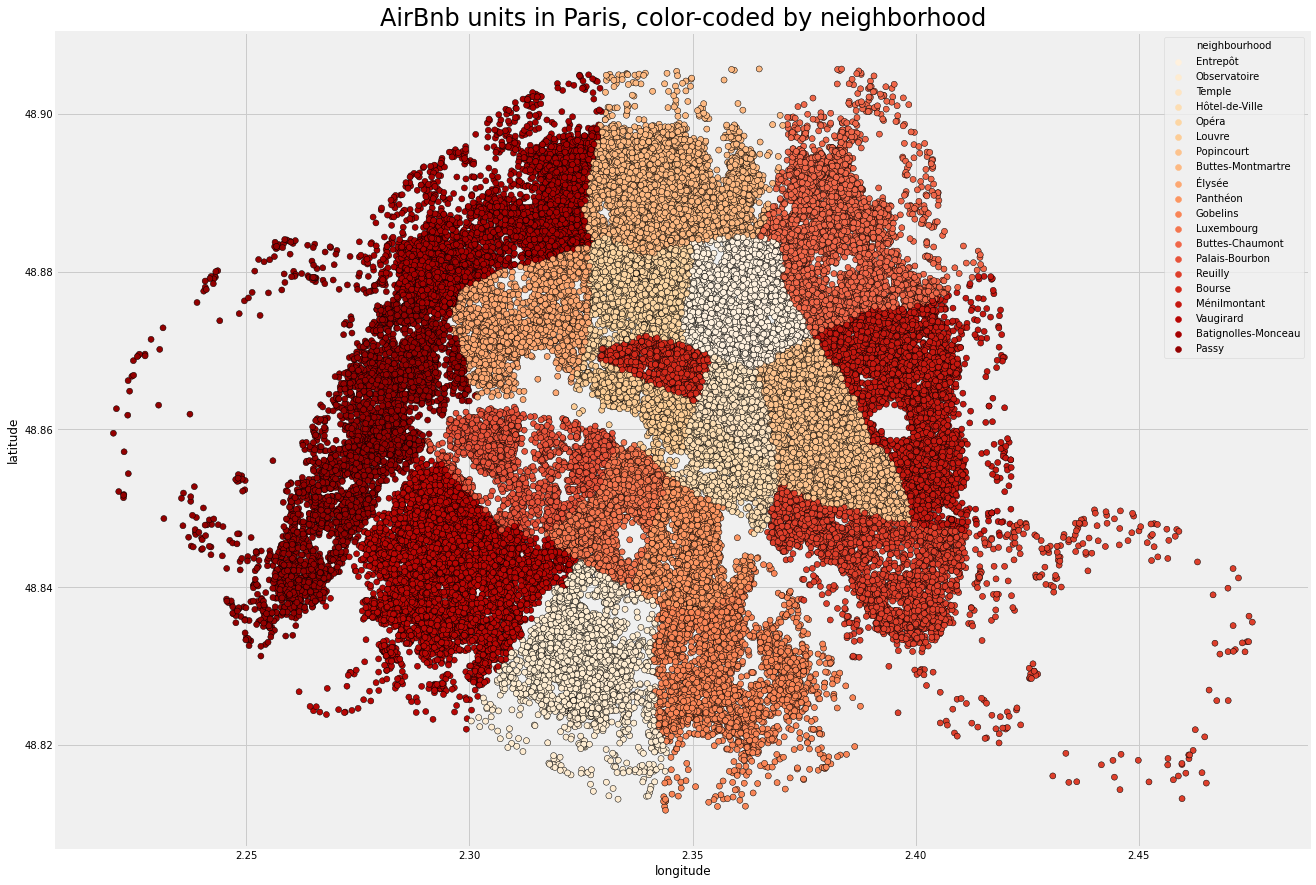

In [10]:
title = 'AirBnb units in Paris, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_paris_unique.longitude, master_df_paris_unique.latitude, hue = master_df_paris_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_paris.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([paris_raw_df_10_6_2021,raw_df_paris],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.852070,2.358710,Entire home/apt,100,...,4.55,4.47,4.77,4.82,4.96,4.53,f,1,0,0
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.859090,2.353150,Entire home/apt,105,...,4.79,4.43,4.91,4.88,4.92,4.70,f,1,0,0
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.874170,2.342450,Entire home/apt,130,...,5.00,5.00,5.00,5.00,5.00,5.00,f,1,0,0
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.858990,2.347350,Entire home/apt,75,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0
4,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.862270,2.371340,Entire home/apt,80,...,4.97,4.88,5.00,4.91,4.91,4.94,f,1,0,0
5,10586,Montmartre Studio 7 (bail meublé ou mobilité),37107,Michael,NaN,Buttes-Montmartre,48.889020,2.346560,Entire home/apt,80,...,4.77,4.77,4.88,4.98,4.60,4.67,f,4,0,0
6,10588,Montmartre Studio 10 (bail meublé ou mobilité),37107,Michael,NaN,Buttes-Montmartre,48.889180,2.344900,Entire home/apt,75,...,4.88,4.94,5.00,4.94,4.59,4.69,f,4,0,0
7,10917,ELYSEES-PONCELET FLAT NEAR CH. ELYS,39402,Isabelle,NaN,Batignolles-Monceau,48.879074,2.296904,Entire home/apt,143,...,4.50,4.19,4.31,3.93,4.40,4.06,t,1,0,0
8,11213,DOWNTOWN PARIS,41322,Mathieu,NaN,Entrepôt,48.871100,2.374240,Private room,170,...,4.77,4.36,4.86,4.92,4.69,4.55,f,0,2,0
9,11265,Elegant appartment in Montmartre,41718,Sylvie,NaN,Buttes-Montmartre,48.884340,2.340050,Entire home/apt,100,...,4.81,4.94,4.53,4.75,4.93,4.80,f,1,0,0


## Regression

In [13]:
#df_reviews_.columns

In [12]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [13]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -123.46361325938904
Coefficients:  [ 39.53739732  23.6139024  -11.09358896   1.13951589   1.00130749
  -3.38778513  26.68326242  27.99843372 -31.94919219]
LinearRegression()


In [14]:
y_pred2 = regr.predict(X_)

In [38]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 50')
df_result.head()
df_result.shape

(35639, 3)

<function matplotlib.pyplot.ylim(*args, **kwargs)>

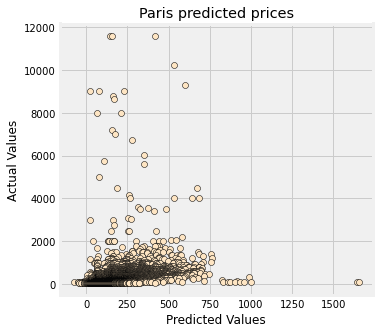

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Paris predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim

In [22]:
df_result.index

Int64Index([44622, 43409, 49052, 34548, 39606, 13230, 18149, 29523, 21568,
            33310,
            ...
            40686, 20654, 40220, 40014, 20712, 20698, 19715, 20464,  9668,
            18457],
           dtype='int64', length=35639)

In [23]:
raw_df_paris.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,https://www.airbnb.com/rooms/5396,20211009153557,2021-10-11,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed studio apartment that mixes old and new aesthetics at the very heart of Paris, on the famous Isle St Louis that is a stone's throw from Le Marais, Quartier Latin, Notre Dame and Le Louvre.<br /><br /><b>The space</b><br />Small, well appointed studio apartment at the very heart of Paris, on the famous Isle St Louis.<br /><br />We are looking for quiet persons or couples to rent our fully equipped studio (about 30 square meters or 300 square feet) in central Paris on the famous Isle St. Louis.<br /><br />No smoking and parties are forbidden<br /><br />The location is superb in heart of Paris and to close to all amenities (buses, metro, velib)<br /><br /><b>Guest access</b><br />The flat includes :<br /> - A redone bathroom <br />- A kitchenette fully equipped (oven, fridge, hob, kitchen utensil, kettle, washing machine...)<br />- A desk<br />- A comfortable sofa-bed<br />- A storage for your stuffs <br />- Wi-Fi<br /><br />Towels, hairdryer a","You are within walking distance to the Louvre, Notre Dame, Le Marais, Les Halles, Chatelet, St. Germain, Les Tuileries, le Jardin des Plantes, St. Michel, Sorbonne, Institut du Monde Arab, the Bastille and the Latin Quarter.",https://a0.muscache.com/pictures/52413/f9bf76f5_original.jpg,7903,https://www.airbnb.com/users/show/7903,...,4.82,4.96,4.53,7510402838018,f,1,1,0,0,2.68
1,7397,https://www.airbnb.com/rooms/7397,20211009153557,2021-10-11,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /><br /><b>The space</b><br />PLEASE ASK ME BEFORE TO DO A REQUEST !!!<br /><br />PLEASE ASK ME BEFORE TO DO A REQUEST !!!<br /><br /><br />VERY CONVENIENT WITH THE BEST LOCATION !<br /><br /><br />HEART OF THE HISTORICAL PARIS<br /><br /> Marais, in a securated and classified building, 2d floor, charming 2/3Rooms apt 40 m2, Ideal location in the very heart of historical Paris, metro station: Hôtel-de-Ville, just a few minutes on foot to the Centre Pompidou, Place des Vosges, the Seine River, Notre-Dame Cathedral, the Saint-Louis island... and most of the monuments and museums in Paris. Local restaurants and shops cater to all tastes and budgets. Very charming, quiet, sunny, fully furnished, two bedrooms (one with a large bed, the other with a large and very good sofa/bed), Large bathroom with italian shower. Internet+tel+TV included. Electricity included for normal using. Perfect for one couple, two couples or one couple with one or two chi",NaN,https://a0.muscache.com/pictures/67928287/330bd78c_original.jpg,2626,https://www.airbnb.com/users/show/2626,...,4.88,4.92,4.70,7510400829623,f,1,1,0,0,2.28
2,7964,https://www.airbnb.com/rooms/7964,20211009153557,2021-10-10,Large & sunny flat with balcony !,"Very large & nice apartment all for you! <br />- Sunny living room & bedrooms<br />- Well equiped and furnished<br />- Central location & walking distance to many attractions<br />- Great neighborhood<br /><br /><b>The space</b><br />hello !<br />We have a great 75 square meter apartment in the 9e arrondissement. It is located on a pedestrian street in vibrant neighborhood.<br /><br />You will enjoy a central location : walking distance to Galeries Lafayettes, les Halles, Opéra Garnier, Montmartre. There are lots of typical shops and restaurants around. I'll be glad to advice you on which one to try according to what you like. <br /><br />3 very close subway stations : Grands Boulevards, Cadet or Notre-Dame de Lorette.<br /><br />It is on the 5th floor, w

In [39]:
df_result['id'] = df_result.index.values
df_result.shape

(35639, 4)

In [58]:
raw_df_paris.index.values
df_result.index.values

array([44622, 43409, 49052, ..., 20464,  9668, 18457])

In [43]:
df_result_merge = df_result.merge(raw_df_paris, on='id', how='right')
df_result_merge.columns
df_result_merge.shape

(49634, 77)

In [111]:
df_join = df_result.join(raw_df_paris, lsuffix='_x', rsuffix='_y')
df_join.isna().sum()

Actual                                             0
Predicted                                          0
Diff                                               0
id_x                                               0
id_y                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               7948
Length: 78, dtype: int64

In [112]:
df_join.columns

Index(['Actual', 'Predicted', 'Diff', 'id_x', 'id_y', 'listing_url',
       'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm'

In [116]:
df_print =df_join.copy()
df_print = df_print[['id_x','Actual', 'Predicted', 'Diff','listing_url','latitude',
       'longitude','accommodates','neighbourhood_cleansed','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','number_of_reviews']]
df_print_paris = df_print[df_print['Predicted']>0]
df_print_paris.head()

,id_x,Actual,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
44622,44622,11600,145.182943,-11454.817057,https://www.airbnb.com/rooms/48441158,48.89130,2.32154,4,Batignolles-Monceau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
43409,43409,11600,159.865817,-11440.134183,https://www.airbnb.com/rooms/46327664,48.85108,2.39325,4,Popincourt,3.67,5.0,3.33,4.67,4.67,4.33,2.67,3
49052,49052,11600,419.968267,-11180.031733,https://www.airbnb.com/rooms/52278335,48.87825,2.34395,10,Opéra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
34548,34548,10250,532.765978,-9717.234022,https://www.airbnb.com/rooms/37250543,48.86447,2.27903,10,Passy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
39606,39606,9000,26.570751,-8973.429249,https://www.airbnb.com/rooms/42658975,48.87592,2.29525,1,Batignolles-Monceau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [118]:
df_print_paris['neighbourhood_cleansed'].value_counts()

Buttes-Montmartre      3729
Popincourt             3232
Entrepôt               2573
Vaugirard              2572
Batignolles-Monceau    2294
Opéra                  1985
Temple                 1833
Buttes-Chaumont        1787
Passy                  1783
Ménilmontant           1747
Reuilly                1424
Bourse                 1365
Observatoire           1295
Hôtel-de-Ville         1287
Panthéon               1256
Luxembourg             1184
Élysée                 1181
Gobelins               1144
Palais-Bourbon         1059
Louvre                  874
Name: neighbourhood_cleansed, dtype: int64

In [119]:
df_print_paris_final = df_print_paris.dropna(subset = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'])
df_print_paris_final.isna().sum()

id_x                           0
Actual                         0
Predicted                      0
Diff                           0
listing_url                    0
latitude                       0
longitude                      0
accommodates                   0
neighbourhood_cleansed         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
dtype: int64

In [132]:
df_paris_query = df_print_paris_final.query('number_of_reviews >11 & accommodates <=6')
df_paris_query.shape
#df_paris_query.head()

(12668, 17)

In [138]:
df_query_montmartre = df_paris_query[df_paris_query['neighbourhood_cleansed']=='Buttes-Montmartre']
df_query_montmartre = df_query_montmartre.query('review_scores_rating>4.5 & review_scores_location>4.5 &review_scores_value>4.5')
df_query_montmartre.head()

,id_x,Actual,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
37200,37200,2500,252.672043,-2247.327957,https://www.airbnb.com/rooms/40277740,48.88863,2.33468,4,Buttes-Montmartre,5.00,4.83,5.00,4.75,4.92,4.92,4.92,12
8392,8392,741,148.937252,-592.062748,https://www.airbnb.com/rooms/7479590,48.88844,2.34592,2,Buttes-Montmartre,4.57,4.70,4.65,4.68,4.74,4.90,4.66,71
4978,4978,650,311.464433,-338.535567,https://www.airbnb.com/rooms/4880464,48.89430,2.32940,5,Buttes-Montmartre,4.65,4.92,4.81,4.73,4.81,4.62,4.65,30
7546,7546,400,67.082232,-332.917768,https://www.airbnb.com/rooms/7071582,48.88660,2.33292,2,Buttes-Montmartre,4.79,4.95,4.70,4.86,4.88,4.88,4.73,67
1546,1546,399,169.328600,-229.671400,https://www.airbnb.com/rooms/1350985,48.88332,2.34252,2,Buttes-Montmartre,4.84,4.90,4.89,4.80,4.84,4.75,4.72,62


In [139]:
df_query_montmartre.sort_values(by=['Predicted'],ascending=False)

,id_x,Actual,Predicted,Diff,listing_url,latitude,longitude,accommodates,neighbourhood_cleansed,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews
21618,21618,261,341.954848,80.954848,https://www.airbnb.com/rooms/21807545,48.88942,2.32689,6,Buttes-Montmartre,4.84,4.89,4.86,4.98,4.96,4.82,4.66,141
35472,35472,140,339.765060,199.765060,https://www.airbnb.com/rooms/38579841,48.88929,2.34174,6,Buttes-Montmartre,4.67,4.92,4.92,4.42,4.75,5.00,4.75,12
9829,9829,200,316.293607,116.293607,https://www.airbnb.com/rooms/9028649,48.89261,2.32816,6,Buttes-Montmartre,4.91,5.00,4.96,4.96,5.00,4.91,4.77,24
4978,4978,650,311.464433,-338.535567,https://www.airbnb.com/rooms/4880464,48.89430,2.32940,5,Buttes-Montmartre,4.65,4.92,4.81,4.73,4.81,4.62,4.65,30
5593,5593,155,306.325976,151.325976,https://www.airbnb.com/rooms/5666569,48.88625,2.34939,5,Buttes-Montmartre,4.60,4.80,4.53,4.79,4.71,4.64,4.57,18
14996,14996,400,304.680936,-95.319064,https://www.airbnb.com/rooms/14018680,48.88852,2.33603,5,Buttes-Montmartre,4.90,4.86,4.86,4.93,4.93,4.97,4.69,29
26493,26493,235,301.130796,66.130796,https://www.airbnb.com/rooms/27280731,48.88550,2.33413,6,Buttes-Montmartre,4.62,4.79,4.48,4.79,4.86,4.90,4.76,29
44250,44250,195,299.608837,104.608837,https://www.airbnb.com/rooms/47846193,48.88699,2.34521,6,Buttes-Montmartre,4.87,4.87,4.89,4.96,4.91,4.89,4.72,47
21050,21050,290,298.921081,8.921081,https://www.airbnb.com/rooms/21196432,48.88375,2.33694,6,Buttes-Montmartre,5.00,5.00,4.90,4.80,4.75,5.00,4.80,23
37954,37954,139,297.815990,158.815990,https://www.airbnb.com/rooms/40958516,48.89099,2.33755,6,Buttes-Montmartre,4.81,4.58,4.62,4.65,4.65,4.92,4.58,26
